In [1]:
import tensorflow as tf
from  tensorflow.keras import models,layers
data=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
shuffle=True,
image_size=(256,256),
batch_size=32
)


Found 2152 files belonging to 3 classes.


In [2]:
class_names=data.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [3]:
def get_data_partition(ds,train_split=0.8,test_split=0.1,validation_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(validation_split*ds_size)    

    train_data=ds.take(train_size)

    val_data=ds.skip(train_size).take(val_size)
    test_data=ds.skip(train_size).skip(val_size)

    return train_data,test_data,val_data

In [4]:
train_data,test_data,val_data=get_data_partition(data)

In [5]:
len(train_data)

54

In [6]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [8]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [9]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.build(input_shape=(32,256,256,3))

In [10]:
model.compile(optimizer='Adam',               # Optimizer: Adam
              loss= 'sparse_categorical_crossentropy', # Loss function: Sparse categorical crossentropy
              metrics=['accuracy']) 

In [11]:
history=model.fit(train_data,epochs=50,batch_size=10,verbose=1,validation_data=val_data)

Epoch 1/50
54/54 [==============================] - 103s 2s/step - loss: 0.9060 - accuracy: 0.4699 - val_loss: 0.7873 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 112s 2s/step - loss: 0.6993 - accuracy: 0.6690 - val_loss: 0.4871 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 111s 2s/step - loss: 0.4986 - accuracy: 0.7784 - val_loss: 0.3926 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 91s 2s/step - loss: 0.3871 - accuracy: 0.8409 - val_loss: 0.3245 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 132s 2s/step - loss: 0.2951 - accuracy: 0.8918 - val_loss: 0.3127 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 127s 2s/step - loss: 0.2334 - accuracy: 0.9074 - val_loss: 0.1344 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 126s 2s/step - loss: 0.1338 - accuracy: 0.9508 - val_loss: 0.0516 - val_accuracy: 0.9948
Epoch 8/50
54/

In [12]:
scores=model.evaluate(test_data)

8/8 [==============================] - 6s 277ms/step - loss: 0.0303 - accuracy: 0.9844


NameError: name 'acc' is not defined

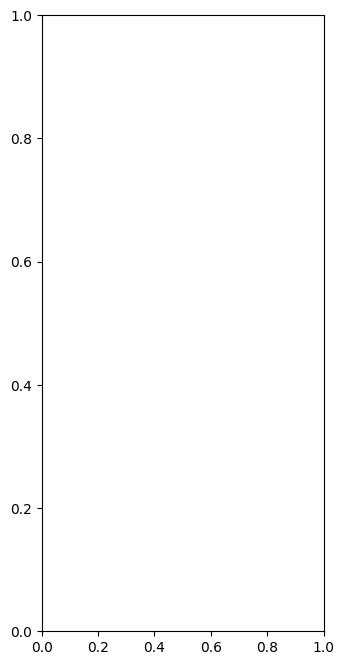

In [18]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
import numpy as np

In [14]:
def predict(model, image):
    # Make predictions using the model
    # This is just a placeholder, replace it with actual prediction logic
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)  # Placeholder for confidence score
    return predicted_class, confidence


1/1 [==============================] - 0s 63ms/step


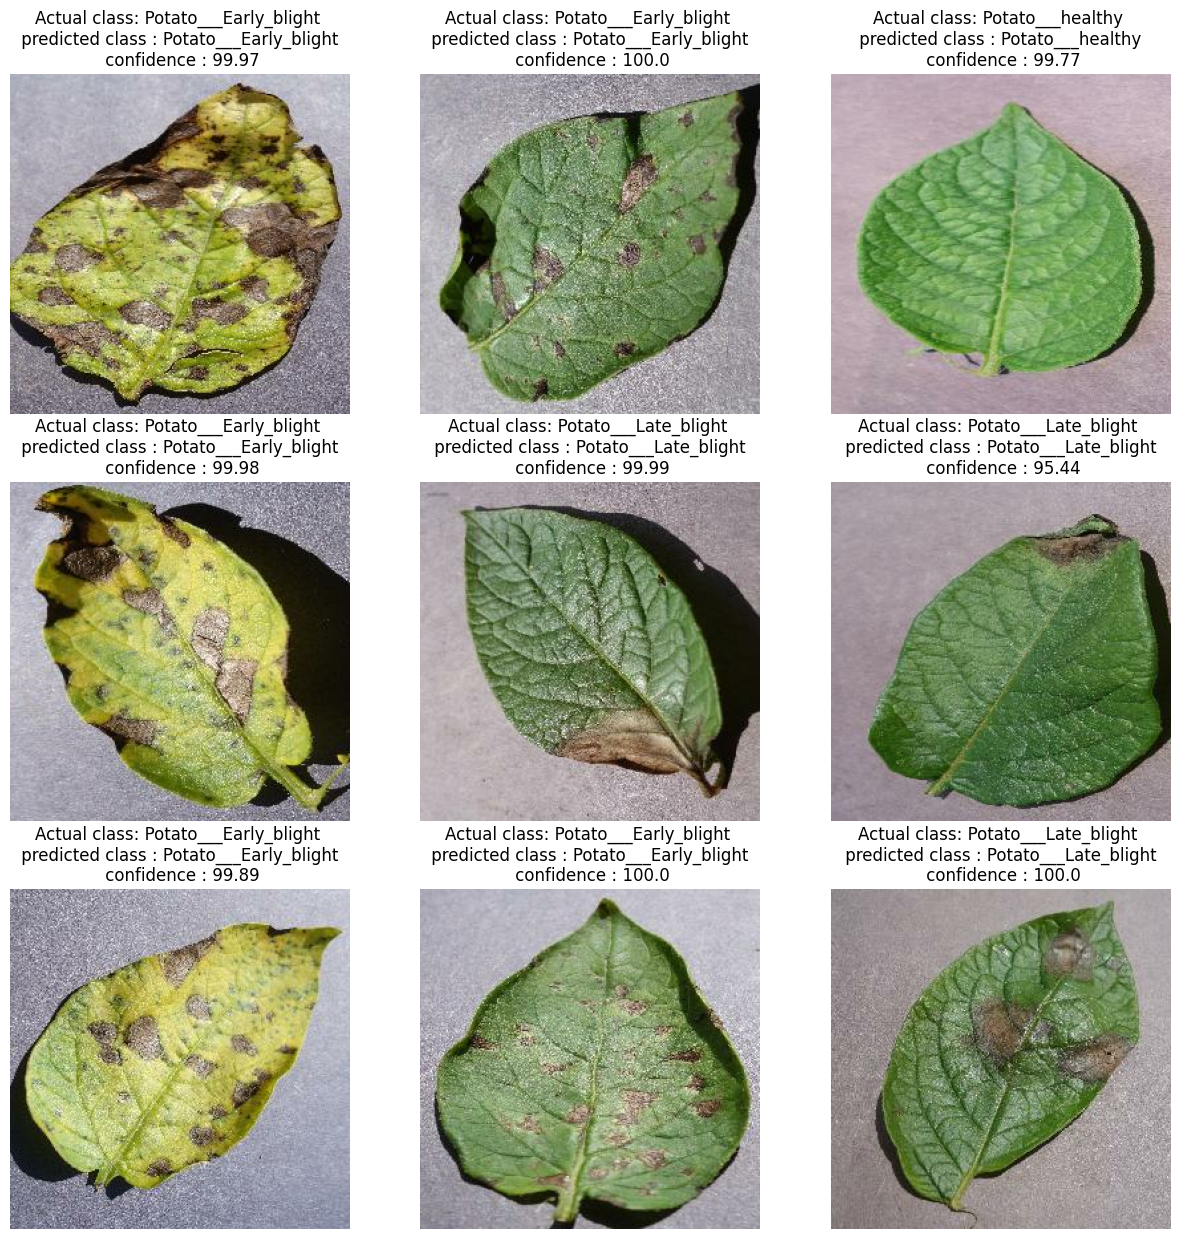

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual class: {actual_class} \n predicted class : {predicted_class} \n confidence : {confidence}")
        plt.axis("off")

In [16]:
model_version=3
model.save(f"saved_models/{model_version}")

INFO:tensorflow:Assets written to: saved_models/3\assets


INFO:tensorflow:Assets written to: saved_models/3\assets


In [17]:
model.save("../potatoes.h5")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
